In [1]:
import autograd.numpy as np
import autograd.scipy as sp
from autograd.scipy import special
from autograd import grad, hessian, hessian_vector_product, hessian, jacobian
import matplotlib.pyplot as plt
%matplotlib inline  

from copy import deepcopy

from scipy import optimize

import math
import time

import valez_finite_VI_lib as vi
from gibbs_sampler_lib import GibbsSampler


In [2]:
alpha = 10 # IBP parameter
num_samples = 2000 # Data set size
x_dim = 2 # dimension
sigma_a = 3.0 ** 2
sigma_eps = 0.2 ** 2 # variance of noise
k_inf = 5 # take to be large for a good approximation to the IBP
k_approx = k_inf
pi_true, z_true, mu_true, a_true, x = vi.generate_data(num_samples, x_dim, k_inf, sigma_a, sigma_eps, alpha)
k_approx = k_inf

tau_init, nu_init, phi_mu_init, phi_var_init = \
    vi.initialize_parameters(num_samples, x_dim, k_approx)


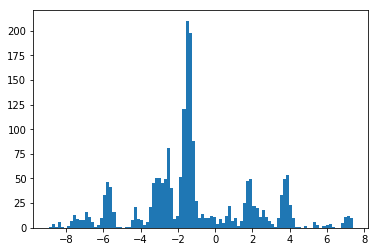

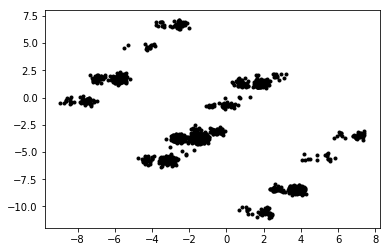

In [ ]:
col = 0
plt.figure()
plt.hist(x[:, col], bins=100);

col1 = 0
col2 = 1
plt.figure()
plt.plot(x[:, col1], x[:, col2], 'k.');

In [ ]:

gibbs_sampler = GibbsSampler(x, k_approx, alpha, sigma_eps, sigma_a)
# Start at the truth
gibbs_sampler.z = z_true.astype(float, copy=True)
gibbs_sampler.a = deepcopy(a_true.T)
gibbs_sampler.pi = deepcopy(pi_true)

burnin = 500
num_gibbs_draws = 500
gibbs_sampler.sample(burnin, num_gibbs_draws)


 20% (201 of 1000) |####                   | Elapsed Time: 0:00:03 ETA: 0:00:15

In [ ]:

a_mean = np.mean(gibbs_sampler.a_draws, 0)
print(a_mean)
print(np.std(gibbs_sampler.a_draws, 0))
print(a_true.T)

plt.figure()
plt.plot(a_true.T.flatten(), a_mean.flatten(), 'k+')

In [ ]:
print(np.mean(gibbs_sampler.pi_draws, 0))
print(np.std(gibbs_sampler.pi_draws, 0))
print(pi_true)

plt.figure()
plt.plot(pi_true, np.mean(gibbs_sampler.pi_draws, 0), 'k+')


In [ ]:
x_pred_draws = np.einsum('nij,nkj->nik', gibbs_sampler.z_draws, gibbs_sampler.a_draws)
x_pred = np.mean(x_pred_draws, 0)
print(x_pred_draws.shape)
print(gibbs_sampler.x.shape)

In [ ]:

for x_col in range(x_dim):
    plt.figure()
    plt.plot(gibbs_sampler.x[:, x_col], x_pred[:, x_col], 'k.')
    plt.title('Column {}'.format(x_col))